<a href="https://www.kaggle.com/code/akshatsaihgal/delhi-house-prediction?scriptVersionId=214888795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/delhi-house-dataset/Delhi house data.csv')


In [3]:
df.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.describe()


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [5]:
df.nunique()


Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       251
dtype: int64

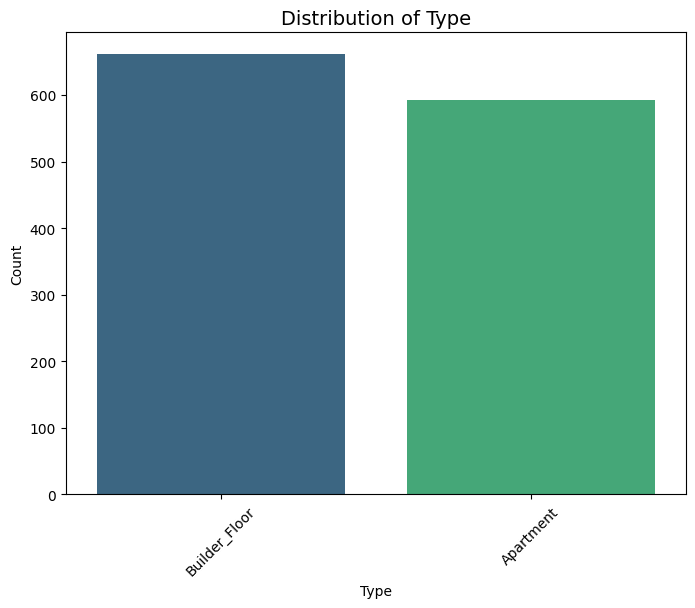

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type', palette='viridis')
plt.title('Distribution of Type', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

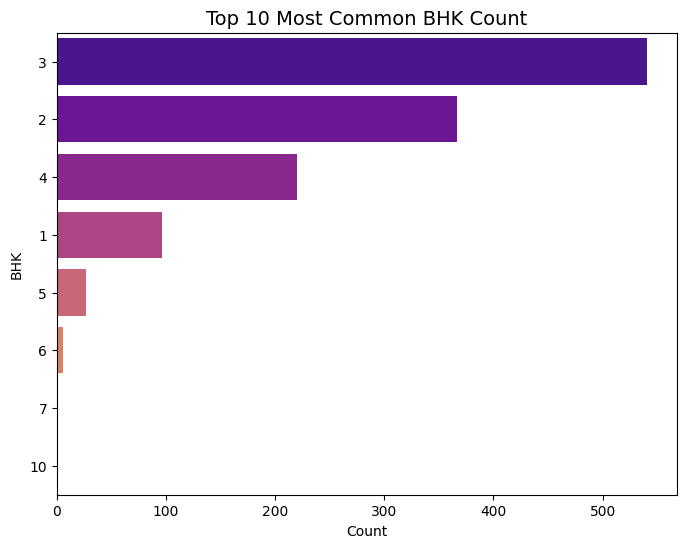

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='BHK', order=df['BHK'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Most Common BHK Count', fontsize=14)
plt.xlabel('Count')
plt.ylabel('BHK')
plt.show()

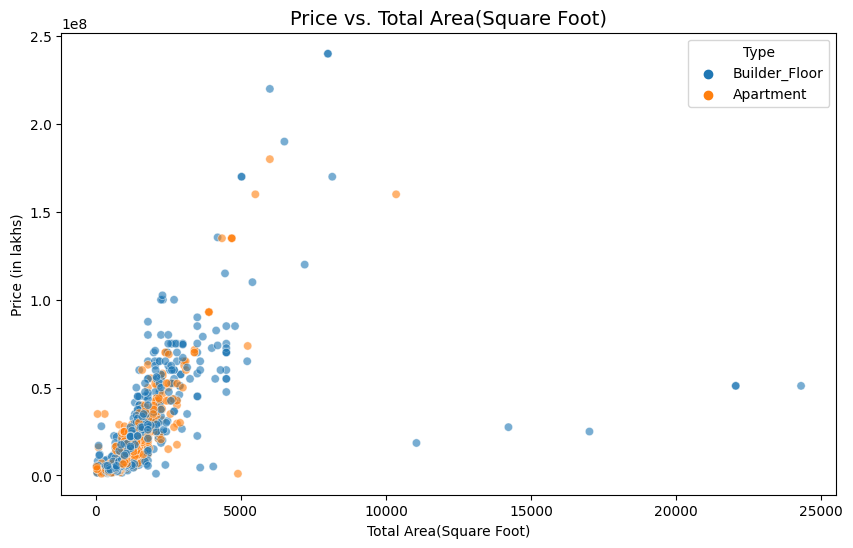

In [8]:
# Plot to visualize Relationship between sqft and price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=pd.to_numeric(df['Area'], errors='coerce'), y='Price', hue='Type', palette='tab10', alpha=0.6)
plt.title('Price vs. Total Area(Square Foot)', fontsize=14)
plt.xlabel('Total Area(Square Foot)')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Type')
plt.show()

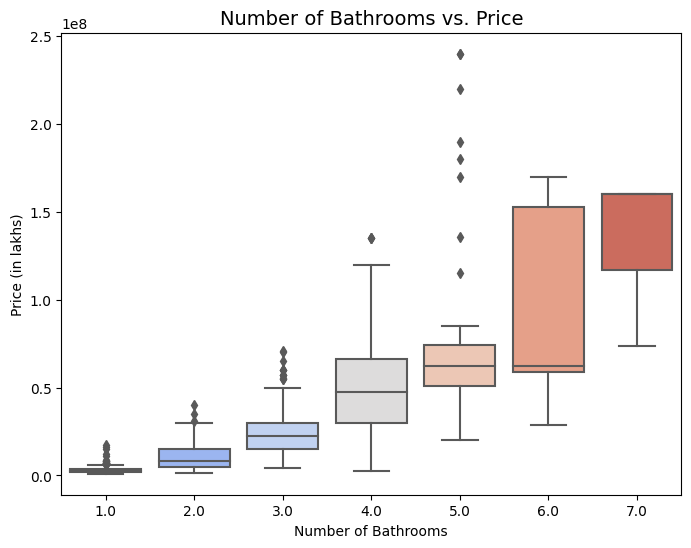

In [9]:
# Plot to compare Impact of bath on price

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Bathroom', y='Price', palette='coolwarm')
plt.title('Number of Bathrooms vs. Price', fontsize=14)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

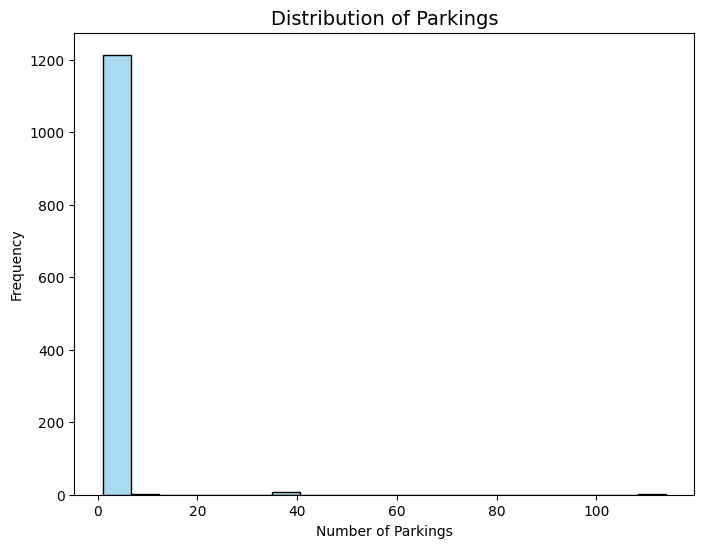

In [10]:
# Plot to visualize Distribution of balcony

plt.figure(figsize=(8, 6))
sns.histplot(df['Parking'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Distribution of Parkings', fontsize=14)
plt.xlabel('Number of Parkings')
plt.ylabel('Frequency')
plt.show()

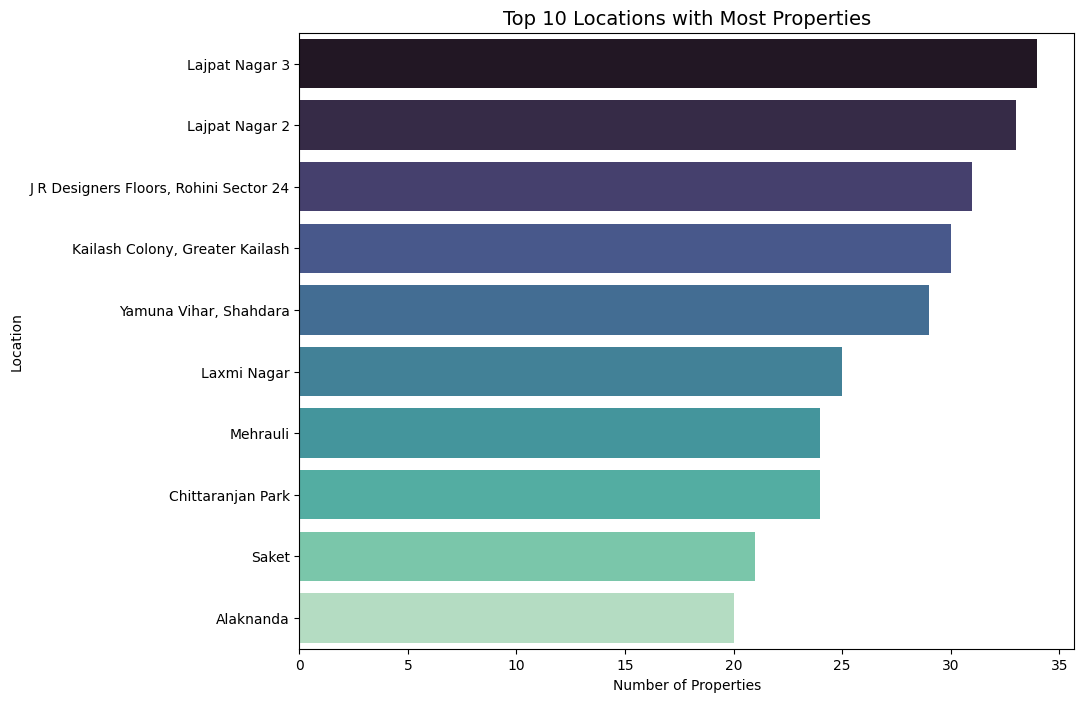

In [11]:
# Plot to explore Frequency of Properties by site location

plt.figure(figsize=(10, 8))
top_locations = df['Locality'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='mako')
plt.title('Top 10 Locations with Most Properties', fontsize=14)
plt.xlabel('Number of Properties')
plt.ylabel('Location')
plt.show()

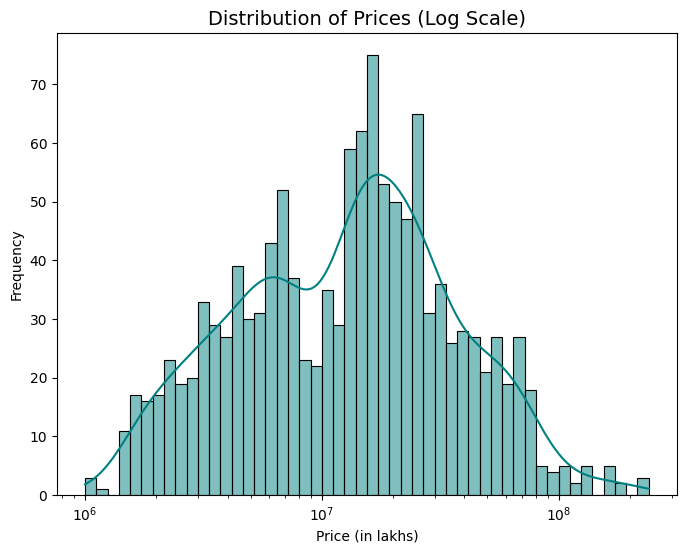

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='teal', log_scale=True)
plt.title('Distribution of Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

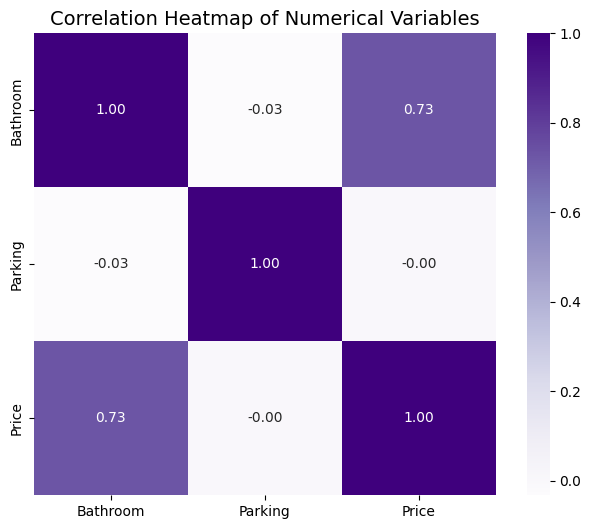

In [13]:
# Heatmaps to visualize correlations among numerical features

numerical_cols = ['Bathroom', 'Parking', 'Price']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

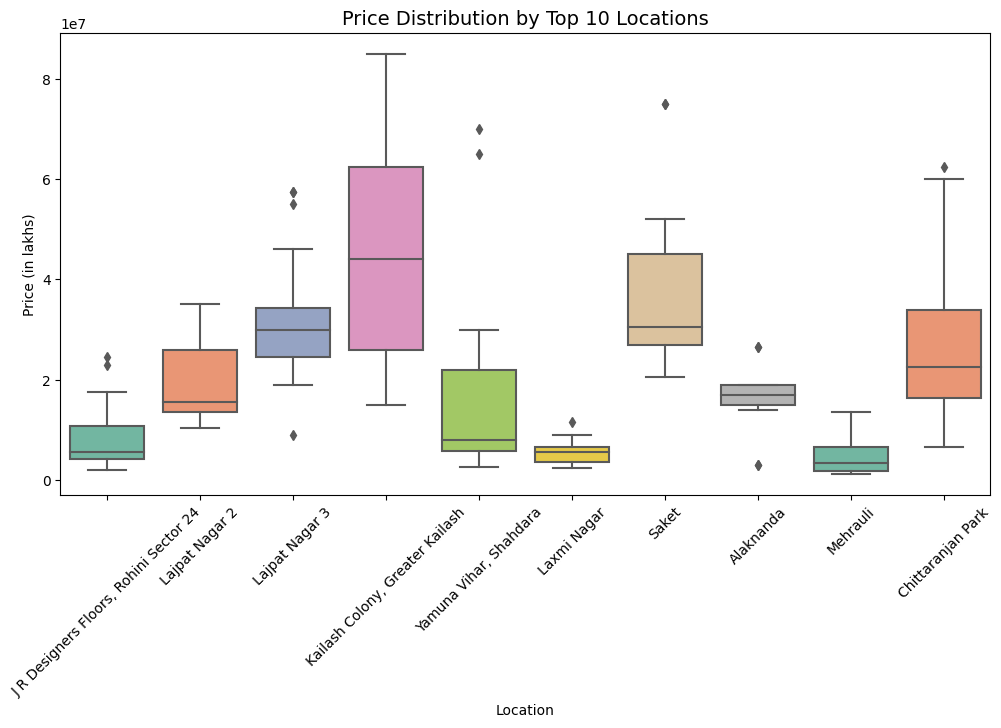

In [14]:
top_locations = df['Locality'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Locality'].isin(top_locations)], x='Locality', y='Price', palette='Set2')
plt.title('Price Distribution by Top 10 Locations', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()


# Data Preprocessing

In [15]:
df = df.drop('Furnishing', axis='columns')
df.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [16]:
# Filling missing values

df['Parking'].fillna(df['Parking'].median(), inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Per_Sqft'].fillna(df['Per_Sqft'].mode()[0], inplace=True)

df = df.dropna(subset=['Type'])


In [17]:
df.isnull().sum()


Area           0
BHK            0
Bathroom       0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [18]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['Per_Sqft'].apply(isFloat)] 
# Displaying all the rows that are not integers
# This tells us that there is no range values or any problematic values for our model prediction
# If there were any we would then Convert 'Per_Sqft' values to numeric format and creates a new column new_Per_sqft

#def convert_sqft_to_num(x):
#    tokens = x.split('-')
#    if len(tokens) == 2:
#        return (float(tokens[0])+float(tokens[1]))/2
#    try:
#        return float(x)
#    except:
#        return None

#df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
#df = df.drop('total_sqft', axis='columns')
#df.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft


In [19]:
# Calculating the price per square foot by taking the price and dividing it by the per square footage

df['price_per_sqft'] = (df['Price'])/df['Per_Sqft']
df.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,price_per_sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0,520.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,749.962502
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,2324.883756
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,629.968502
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,929.953502


In [20]:
df.isnull().sum()


Area              0
BHK               0
Bathroom          0
Locality          0
Parking           0
Price             0
Status            0
Transaction       0
Type              0
Per_Sqft          0
price_per_sqft    0
dtype: int64

In [21]:
df.head(10)

,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,price_per_sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0,520.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,749.962502
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,2324.883756
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,629.968502
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,929.953502
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,2324.883756
6,1350.0,4,3.0,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,1499.925004
7,650.0,2,2.0,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,649.983750
8,985.0,3,3.0,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,1104.972376
9,1300.0,4,4.0,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,2437.439064


In [22]:

from scipy.stats import zscore

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = df[numerical_columns].apply(zscore)
df = df[(np.abs(df) < 3).all(axis=1)]

print(f"Original number of rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")

Original number of rows: 1174
Rows after outlier removal: 1174


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = df.drop(['Price'], axis=1)  # Drop the target column 'price'
y = df['Price']  # Target column 'price'

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [28]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]


In [29]:
Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

In [30]:
Score

[0.8510397316962891,
 0.9931209478810155,
 0.9875384461100531,
 0.8826971952025591,
 0.9907924016217592,
 0.9804302744657685]

## Best model evaluation is given by XGBoost Classifier

In [31]:
# R2 score for the XGBoost model

XGBoost.fit(X_train,y_train)
print("The R2 score of XGboost : ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of XGboost :  0.9931209478810155


In [32]:
# Mean Squared Error (MSE) for the XGBoost model

y_pred = XGBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for XGBoost: ", mse)

Mean Squared Error (MSE) for XGBoost:  0.003259190710456675


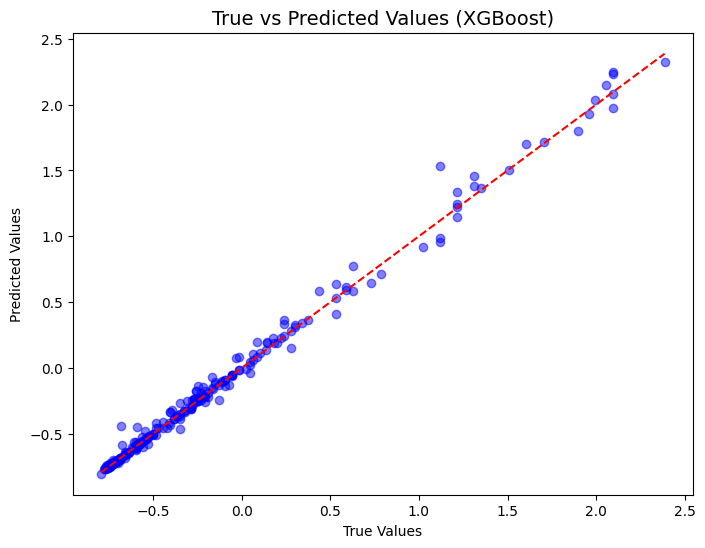

In [33]:
# Plotting True vs Predicted values

y_pred = XGBoost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('True vs Predicted Values (XGBoost)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


### This shows that this model is perfect for us as all data points are centered towards the red dashed line

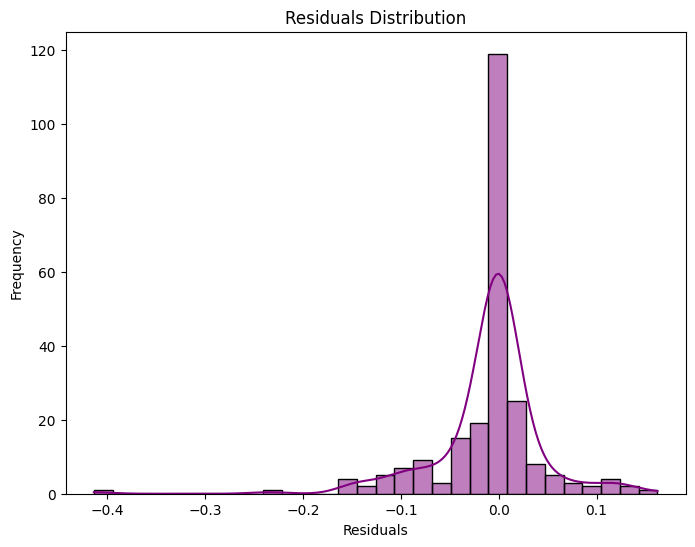

In [34]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### This shows that datapoints that are residuals are more centered towards 0.

In this notebook, we successfully built a model to predict real estate prices in Delhi using factors such as Per square footage, area , number of bathrooms, and parkings availability. After comprehensive data preprocessing and model training, the model achieved an impressive R² score of approximately 99%, demonstrating that it explains nearly all the variance in the dataset.

This high performance highlights the model's effectiveness in predicting property prices, providing valuable insights for buyers, sellers, and investors in Delhi's real estate market. These predictions can support informed decision-making and strategic planning in the industry. Future enhancements could include integrating external market factors or experimenting with more complex algorithms to refine the predictions further.